In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
energydata = pd.DataFrame.from_csv('./energydata_complete.csv', index_col=None, encoding="utf-8")
energydata["date"] = pd.to_datetime(energydata.date)
energydata["consumedE"] = energydata["Appliances"]+energydata["lights"]
energydata = energydata[(energydata.date>=pd.to_datetime("2016-01-12")) & (energydata.date<pd.to_datetime("2016-05-27"))]
#energydata.head()

In [3]:
energydata.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,consumedE
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,101.496833
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,104.380829
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,10.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,50.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,60.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,100.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,1110.000000


In [4]:
from sklearn.linear_model import LinearRegression
X = energydata.drop(["Appliances","lights",'consumedE',"date","rv1","rv2"], axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()

In [5]:
lm.fit(X, energydata.consumedE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ["name", 'estimatedCoefficients'])

,name,estimatedCoefficients
0,T1,0.886883
1,RH_1,16.528120
2,T2,-21.609444
3,RH_2,-14.879624
4,T3,25.362361
5,RH_3,5.110522
6,T4,6.215478
7,RH_4,3.016504
8,T5,-0.007228
9,RH_5,0.287910


In [7]:
lm.score(X,energydata.consumedE)

0.15409417700342387

# Dickey-Fuller Test

In [24]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries,counts):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=counts)
    rolstd = pd.rolling_std(timeseries, window=counts)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\soloc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=144,center=False).mean()
  
C:\Users\soloc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=144,center=False).std()
  import sys


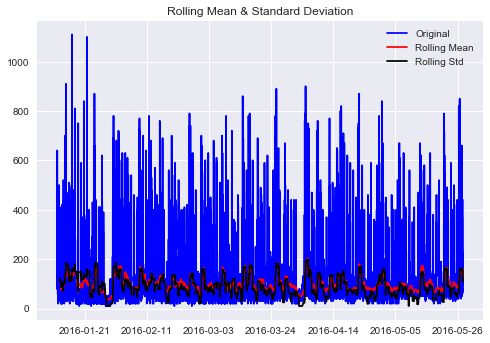

Results of Dickey-Fuller Test:
Test Statistic                   -21.421140
p-value                            0.000000
#Lags Used                        11.000000
Number of Observations Used    19723.000000
Critical Value (1%)               -3.430682
Critical Value (5%)               -2.861687
Critical Value (10%)              -2.566848
dtype: float64


In [25]:
test_stationarity(X.consumedE,144)

# 1 Feature reduction

The table that I am using contains 30 columns, many of them will not present a significant contribution to the varable that I am predicting, so I will remove those ones that are poorly correlated with the consumedE column.

## 1.1  Removing features with low variance

Features with low variance do not contribute to the change of the predicte variable, so I will check if any of the columns in the table present a low variance.

In [8]:
from sklearn.feature_selection import VarianceThreshold

In [9]:
X = energydata.drop(["date"], axis = 1)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = pd.DataFrame(sel.fit_transform(X), columns=X.columns)

In [10]:
len(X.columns)

29

## 1.2 mutual_info

it measures the dependency between the variables. Mutual information methods can capture any kind of statistical dependency.

In [11]:
from sklearn.feature_selection import f_regression, mutual_info_regression

In [12]:
X = energydata.drop(["date","consumedE","Appliances","lights"], axis = 1)
mi = mutual_info_regression(X, energydata.consumedE)
mi /= np.max(mi)

C:\Users\soloc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [13]:
mean_mi = sum(mi)/len(mi)
mean_mi

0.6261823319466977

In [14]:
mifeatures = pd.DataFrame(list(zip(X.columns, mi)), columns = ["name", 'miCoefficient'])
mifeatures[mifeatures.miCoefficient > mean_mi]

,name,miCoefficient
0,T1,0.841397
1,RH_1,0.749916
2,T2,0.811454
4,T3,0.847013
5,RH_3,0.710662
6,T4,0.929574
7,RH_4,0.688285
8,T5,1.000000
9,RH_5,0.628221
11,RH_6,0.884228


In [15]:
mifeatures = mifeatures[mifeatures.miCoefficient < mean_mi]

In [16]:
X = X.drop(list(mifeatures.name.values), axis = 1)

In [17]:
X["date"] = energydata.date
X["consumedE"] = energydata.consumedE

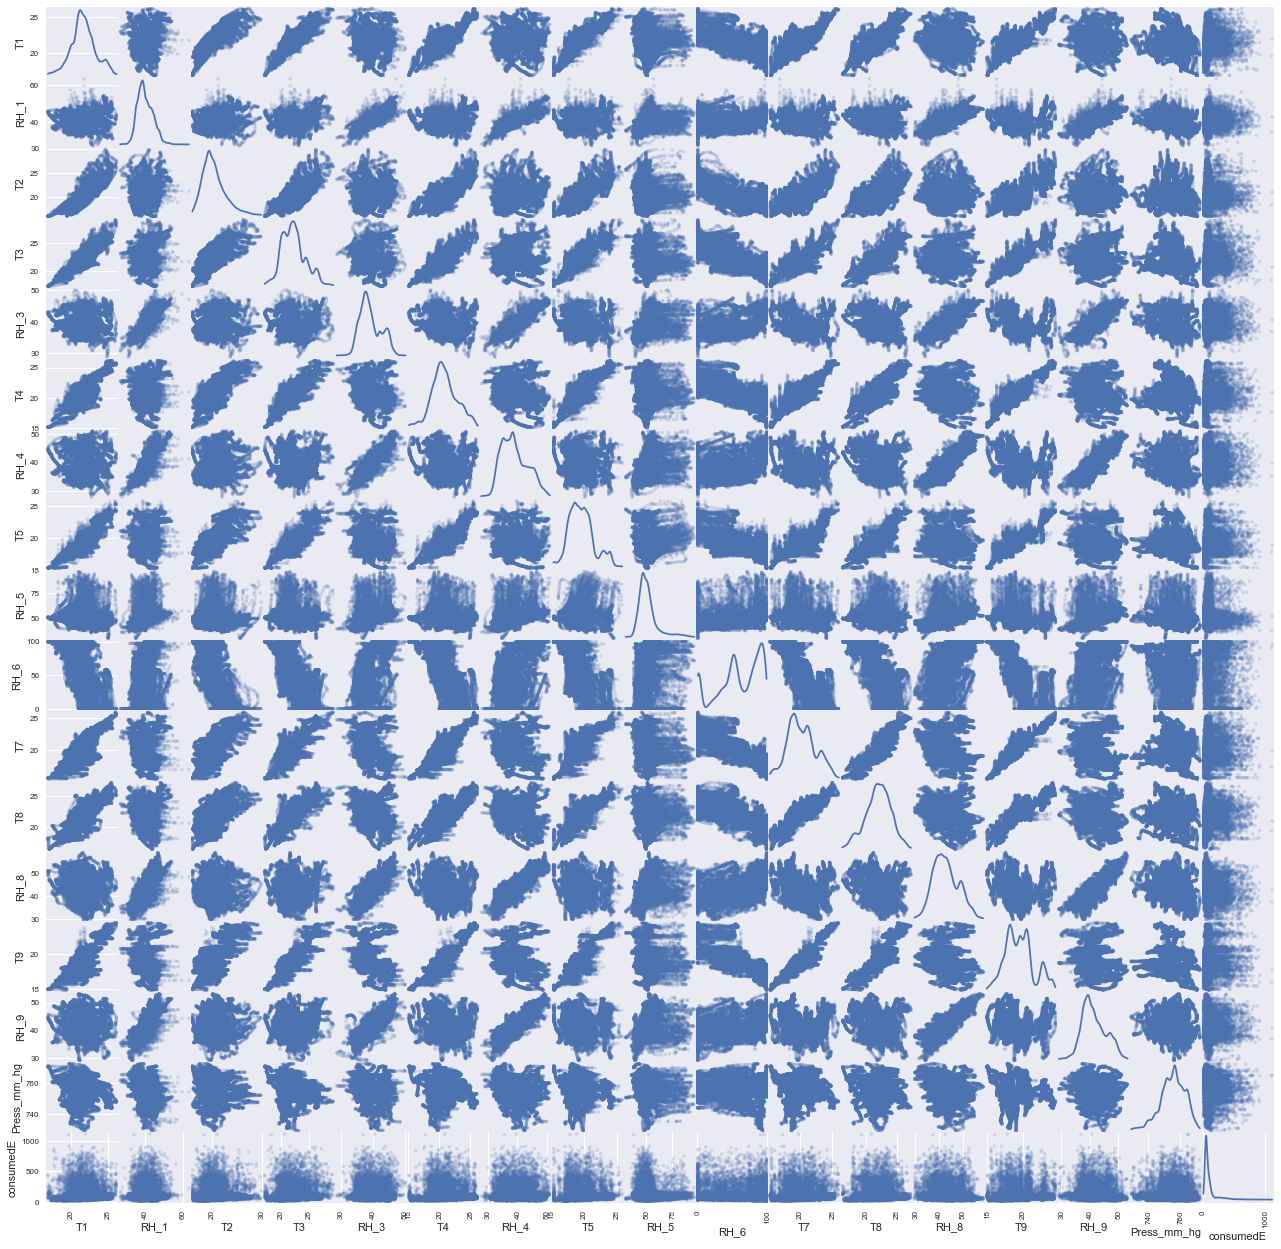

In [18]:
from pandas.plotting import scatter_matrix
axs = scatter_matrix(X, alpha=0.2, diagonal='kde',figsize=(22,22))

First try of VAR

In [20]:
from statsmodels.tsa.api import VAR, DynamicVAR

C:\Users\soloc\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [21]:
X=X.set_index("date")

In [23]:
X.min()

T1              16.790000
RH_1            27.023333
T2              16.100000
T3              17.200000
RH_3            28.766667
T4              15.100000
RH_4            27.660000
T5              15.330000
RH_5            29.815000
RH_6             1.000000
T7              15.390000
T8              16.306667
RH_8            29.600000
T9              14.890000
RH_9            29.166667
Press_mm_hg    729.300000
consumedE       10.000000
dtype: float64

In [ ]:
#data = np.log(X).diff(144).dropna()
#X = np.log(X)
#data = X - X.shift(144)
#data.dropna(inplace=True)

In [32]:
dfdate = X # 1. Dickey-Fuller Test.diff(7).dropna() #np.log(dfdate).diff(7).dropna()

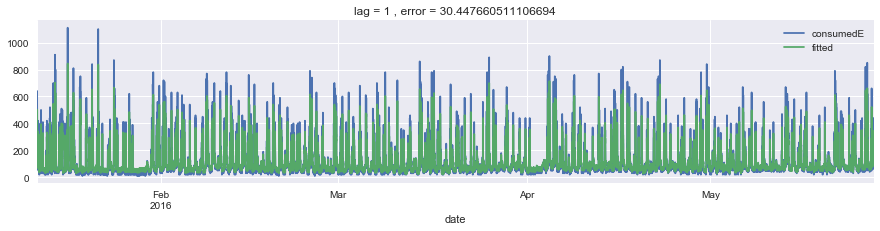

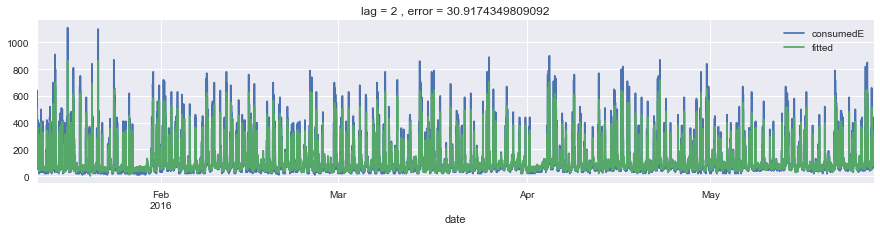

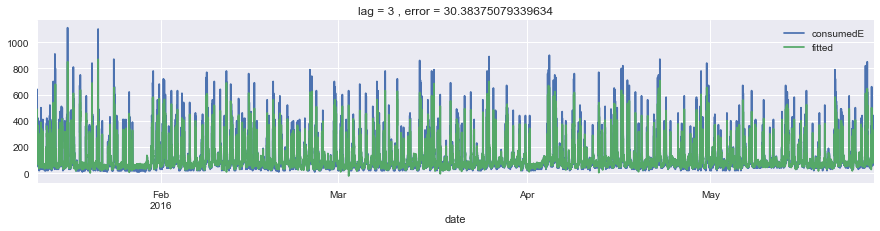

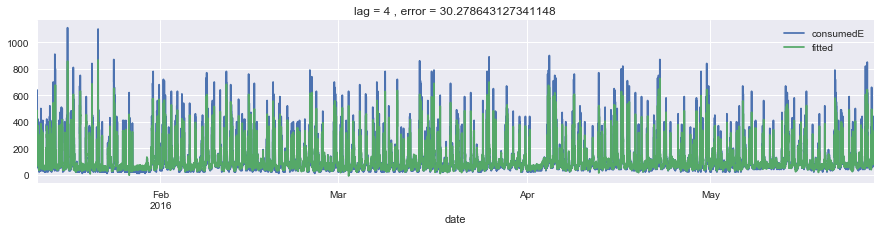

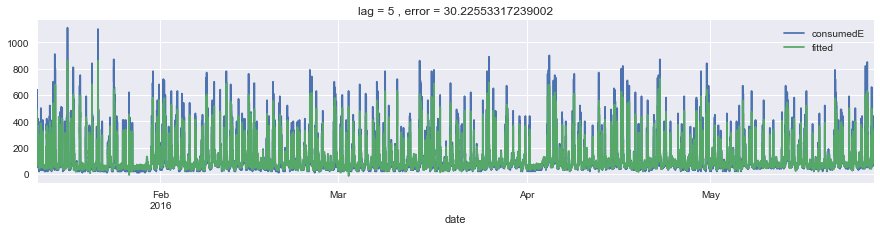

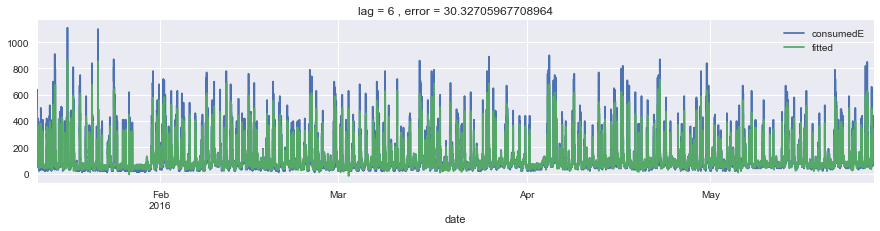

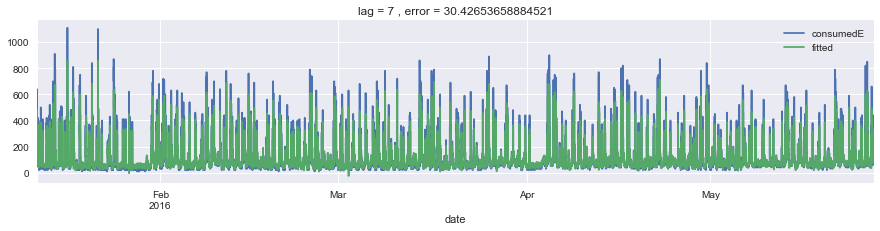

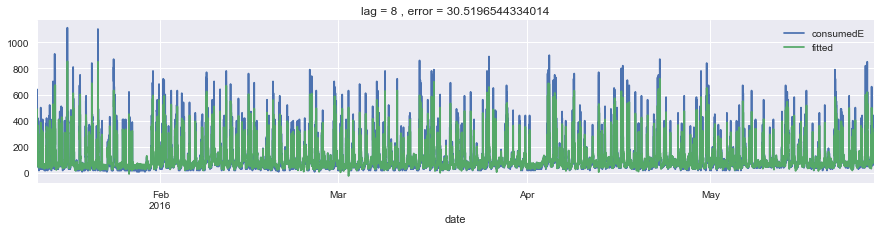

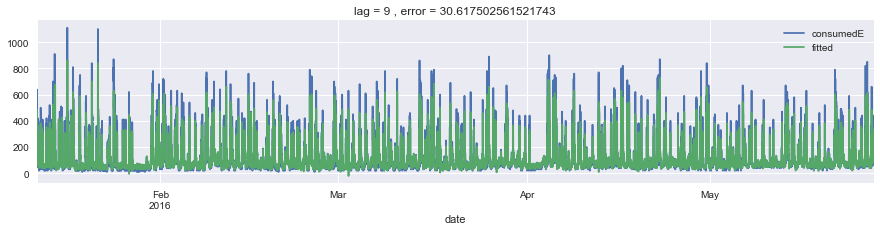

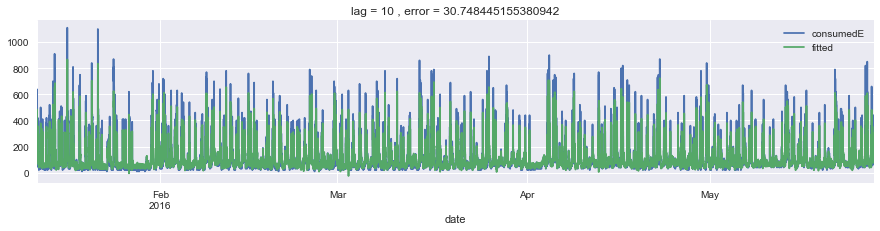

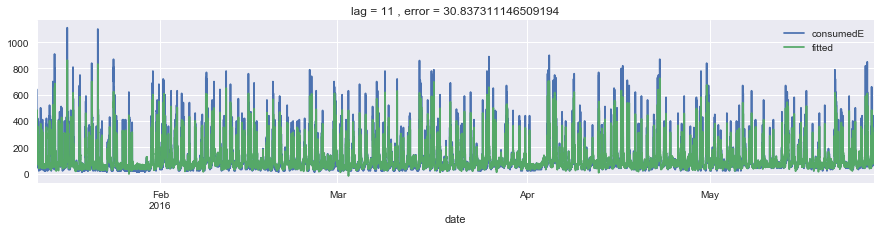

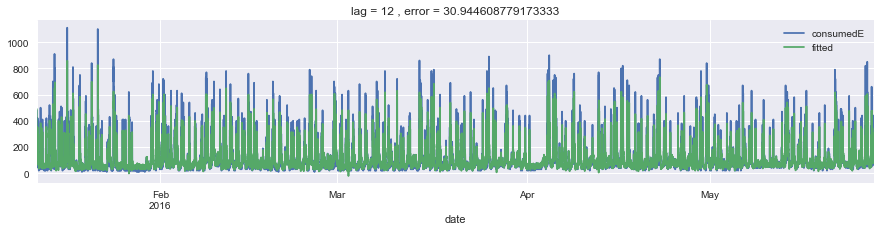

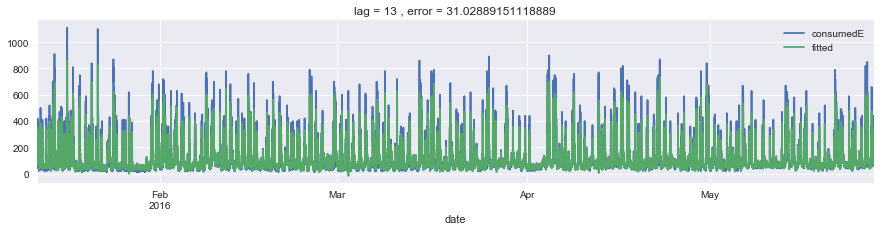

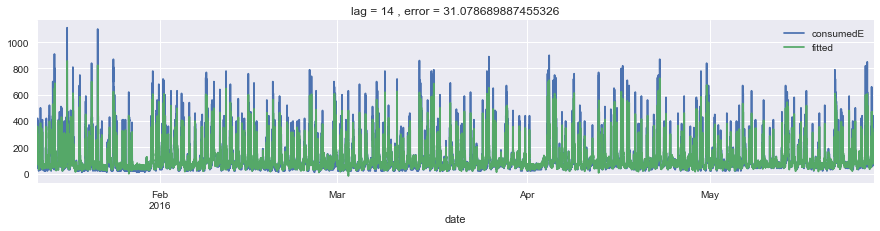

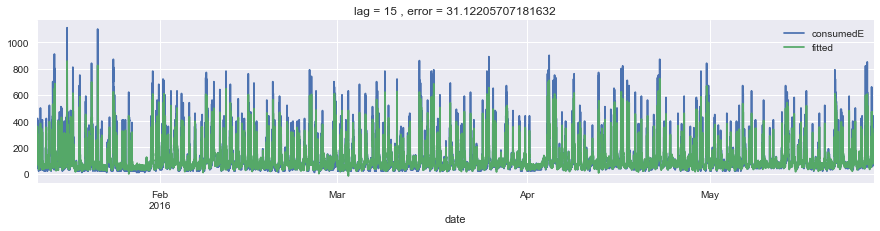

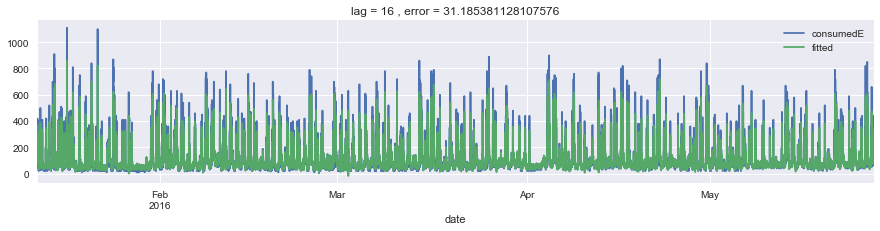

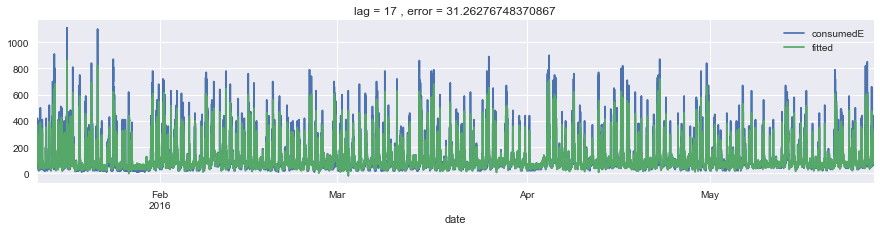

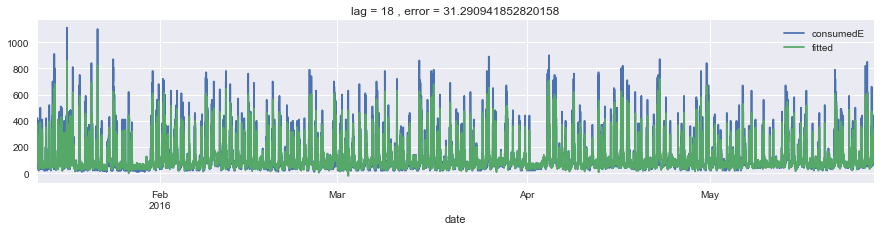

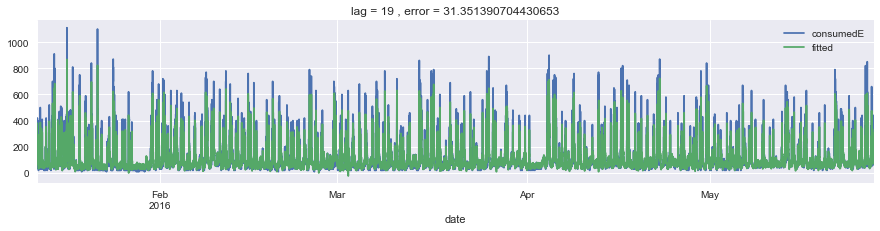

In [34]:
max_lag = 20
errorvalue = np.zeros((max_lag-1,2))
for i in range(1,max_lag):
    model = VAR(dfdate)
    results = model.fit(i)
    final = pd.DataFrame(dfdate.consumedE)
    final["fitted"] = results.fittedvalues.consumedE
    final = final.dropna()
    final["error"] = np.abs(final.fitted - final.consumedE)/final.consumedE
    errorvalue[i-1,0] = int(i)
    errorvalue[i-1,1] = final.error.mean()*100

    df=pd.DataFrame(dfdate.consumedE)
    df["fitted"]=results.fittedvalues.consumedE
    df = df.dropna()
    df[["consumedE","fitted"]].plot(figsize=(15, 3),title="lag = %s , error = %s"%(i,final.error.mean()*100))

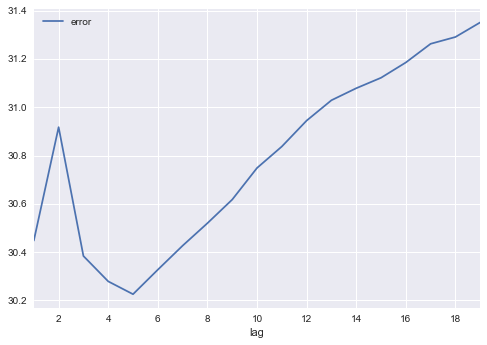

In [35]:
errorplt = pd.DataFrame(errorvalue,columns=["lag","error"])
errorplt = errorplt.set_index("lag")
errorplt.plot()